In [1]:
import pandas as pd
import scipy.stats as stats #for statistical calculations
import numpy as np

In [2]:
data_frame = pd.read_csv("pet_adoption_data.csv")
data_frame.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [3]:
dogs = data_frame.query("PetType == 'Dog'")
dogs
white_dogs = dogs.query("Color == 'White'")
small_dogs = white_dogs.query("Size == 'Small'")
else_dogs = dogs.query("Color != 'White'")
else_dogs = pd.concat([else_dogs,white_dogs.query("Size != 'Small'")])
print(len(else_dogs),len(small_dogs))
small_dogs = small_dogs.query("AdoptionLikelihood == 1")
else_dogs = else_dogs.query("AdoptionLikelihood == 1")
print(len(else_dogs),len(small_dogs))
stats.mannwhitneyu(np.array(small_dogs['TimeInShelterDays']),np.array(else_dogs['TimeInShelterDays']),alternative='less')

482 40
226 16


MannwhitneyuResult(statistic=1315.5, pvalue=0.03450025015193805)

In [4]:
def U_test(df, pet_type=None, breed=None, max_age_months=None, color=None, size=None, adopted = None,direction = 'two-sided'):
    pets = filter_pets(df,pet_type, breed, max_age_months, color, size, adopted )
    return stats.mannwhitneyu(np.array(pets[0]['TimeInShelterDays']),np.array(pets[1]['TimeInShelterDays']),alternative=direction)

In [5]:
U_test(data_frame,pet_type='Cat',color='Orange',adopted=1,direction='greater')

NameError: name 'filter_pets' is not defined

In [ ]:
U_test(data_frame,pet_type='Dog',size='Small',color='White',adopted=1,direction='less')

MannwhitneyuResult(statistic=1315.5, pvalue=0.03450025015193805)

find the empirical function of small_white_dog and orange_cats

In [ ]:
def filter_pets(df, pet_type=None, breed=None, max_age_months=None, color=None, size=None, adopted = None):
    """
    Filter the pets DataFrame based on specified criteria.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing pet data.
    pet_type (str): The type of pet to filter by.
    breed (str): The breed of the pet to filter by.
    max_age_months (int): The maximum age of the pet in months to filter by (pets younger than this age).
    color (str): The color of the pet to filter by. ('white', 'black', 'orange')
    size (str): The size of the pet to filter by. ('small', 'medium', 'large')
    
    Returns:
    pd.DataFrame: A DataFrame filtered by the specified criteria.
    pd.DataFrame: A complementary DataFrame with pets that do not match the criteria.
    """
    
    df_filtered = df
    df_complementary = df
    
    # Filter by pet type if specified
    if pet_type:
        df_filtered = df_filtered[df_filtered['PetType'] == pet_type]
        df_complementary = df_complementary[df_complementary['PetType'] == pet_type]
        
    # Apply filters to get the main subset
    if breed:
        df_filtered = df_filtered[df_filtered['Breed'] == breed]
    if max_age_months is not None:
        df_filtered = df_filtered[df_filtered['AgeMonths'] < max_age_months]
    if color:
        df_filtered = df_filtered[df_filtered['Color'] == color]

    if adopted:
        df_filtered = df_filtered[df_filtered['AdoptionLikelihood'] == adopted]
        df_complementary = df_complementary[df_complementary['AdoptionLikelihood'] == adopted]
    if size:
        df_filtered = df_filtered[df_filtered['Size'] == size]
    
    # Create the complementary subset by excluding the filtered results
    df_complementary = df_complementary[~df_complementary.index.isin(df_filtered.index)]
    
    return df_filtered, df_complementary

In [ ]:
dogs = data_frame.query("PetType == 'Dog'")
white_dogs = dogs.query("Color == 'White'")
small_dogs = white_dogs.query("Size == 'Small'")
small_dogs.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
23,523,Dog,Golden Retriever,86,White,Small,8.475576,1,0,30,405,0,0
54,554,Dog,Golden Retriever,23,White,Small,26.127081,1,0,63,206,0,1
164,664,Dog,Labrador,130,White,Small,18.482545,1,0,36,18,0,1
182,682,Dog,Poodle,4,White,Small,4.422175,1,0,1,222,0,1
188,688,Dog,Poodle,124,White,Small,6.071634,1,0,7,9,0,0


In [ ]:
check = filter_pets(data_frame,pet_type="Dog",color="White",size="Small",adopted=1)
print(len(check[0]),len(check[1]))
print(check[0].head())
print(check[1].head())


16 226
     PetID PetType             Breed  AgeMonths  Color   Size   WeightKg  \
54     554     Dog  Golden Retriever         23  White  Small  26.127081   
164    664     Dog          Labrador        130  White  Small  18.482545   
182    682     Dog            Poodle          4  White  Small   4.422175   
536   1036     Dog          Labrador         39  White  Small   5.211526   
858   1358     Dog          Labrador        131  White  Small  24.473397   

     Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  \
54            1                0                 63          206   
164           1                0                 36           18   
182           1                0                  1          222   
536           1                0                  9          307   
858           1                0                 51          119   

     PreviousOwner  AdoptionLikelihood  
54               0                   1  
164              0                   1  
182 

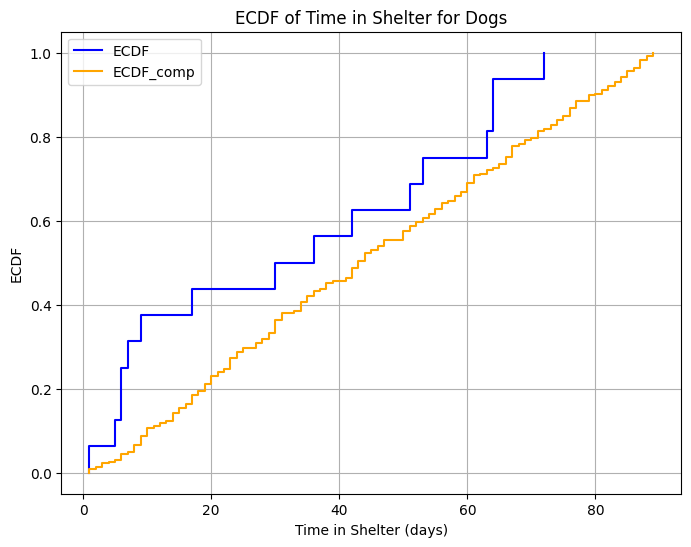

In [ ]:



import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

dogs_df = check[0]
time_in_shelter = dogs_df['TimeInShelterDays']

# Compute the ECDF
ecdf = ECDF(time_in_shelter)

#complanitory
dogs_df_comp = check[1]
time_in_shelter_comp = dogs_df_comp['TimeInShelterDays']

# Compute the ECDF
ecdf_comp = ECDF(time_in_shelter_comp)

# Plot the ECDF
plt.figure(figsize=(8, 6))
plt.step(ecdf.x, ecdf.y, where='post', label='ECDF', color='blue')
plt.step(ecdf_comp.x, ecdf_comp.y, where='post', label='ECDF_comp', color='orange')

plt.xlabel('Time in Shelter (days)')
plt.ylabel('ECDF')
plt.title('ECDF of Time in Shelter for Dogs')
plt.legend()
plt.grid(True)
plt.show()


lets check if each pet type distribute normal - we will use kolmogorov - smirnof.(using to test wheater or not sample comes from certin distribution)

In [ ]:
from scipy.stats import kstest
import numpy

data = filter_pets(data_frame,adopted=1,pet_type="Dog")[0]
#print(data.head(),data['TimeInShelterDays'].to_numpy())
#perform Kolmogorov-Smirnov test
kstest(data['TimeInShelterDays'].to_numpy(), 'norm')

KstestResult(statistic=0.9821211763485351, pvalue=0.0)

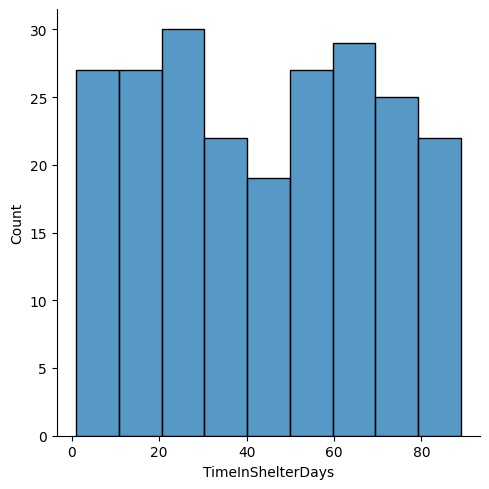

In [ ]:
import seaborn as sns
data = filter_pets(data_frame,adopted=1,pet_type="Dog",max_age_months=6)[1]
#print(data['TimeInShelterDays'])
sns.displot(data,x="TimeInShelterDays")

learning prediction

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Load data
data = data_frame


# Filter the data where AdoptionLikelihood is 1
data = data[data['AdoptionLikelihood'] == 1]
data = data.drop(columns=['PetID'])
# Preprocessing (example)
data = pd.get_dummies(data, columns=['PetType','Breed', 'Color', 'Size', 'Vaccinated', 'HealthCondition'])
X = data.drop(columns=['TimeInShelterDays'])
y = data['TimeInShelterDays']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f'MAE: {mae}')
print(mae/data_frame['TimeInShelterDays'].std())
print(f'RMSE: {rmse}')



MAE: 22.717651515151513
21.009273201171805
RMSE: 25.99090704924367


In [ ]:
print(list(X_test.columns))

['AgeMonths', 'WeightKg', 'AdoptionFee', 'PreviousOwner', 'AdoptionLikelihood', 'PetType_Bird', 'PetType_Cat', 'PetType_Dog', 'PetType_Rabbit', 'Breed_Golden Retriever', 'Breed_Labrador', 'Breed_Parakeet', 'Breed_Persian', 'Breed_Poodle', 'Breed_Rabbit', 'Breed_Siamese', 'Color_Black', 'Color_Brown', 'Color_Gray', 'Color_Orange', 'Color_White', 'Size_Large', 'Size_Medium', 'Size_Small', 'Vaccinated_0', 'Vaccinated_1', 'HealthCondition_0', 'HealthCondition_1']


In [ ]:
print(model.predict(X_test))

[53.94 35.88 33.82 38.4  47.2  35.02 37.99 32.16 47.1  53.22 50.02 45.27
 54.03 51.15 56.   43.72 30.26 28.95 43.85 41.25 56.66 41.87 33.06 36.49
 39.82 42.13 50.19 44.24 46.2  31.78 59.65 43.08 46.21 48.16 39.27 52.54
 52.41 52.98 41.1  51.6  39.93 38.66 43.31 47.78 42.19 42.43 44.51 53.89
 35.79 25.14 47.35 41.63 43.86 39.91 47.93 43.45 52.58 52.72 50.68 36.16
 26.06 33.72 29.04 43.35 56.86 40.17 35.55 28.72 42.17 43.6  44.65 52.05
 39.25 47.42 46.99 40.47 40.88 48.8  45.   36.14 31.89 40.47 39.35 46.77
 41.9  55.26 46.98 38.6  39.33 43.04 48.83 56.08 47.62 43.58 40.88 47.05
 42.96 43.3  55.36 35.78 43.13 57.55 43.99 46.35 51.87 41.06 45.87 45.45
 41.55 35.83 41.01 44.43 43.71 49.93 41.8  32.48 60.07 45.94 47.62 41.3
 36.58 35.8  51.61 53.22 44.   47.44 42.96 53.98 48.76 55.43 48.91 43.87]


linear regression

MAE: 20.822018131247052
MSE: 572.9094060571563
RMSE: 23.935526024241796
R-squared: 0.005887026789267558


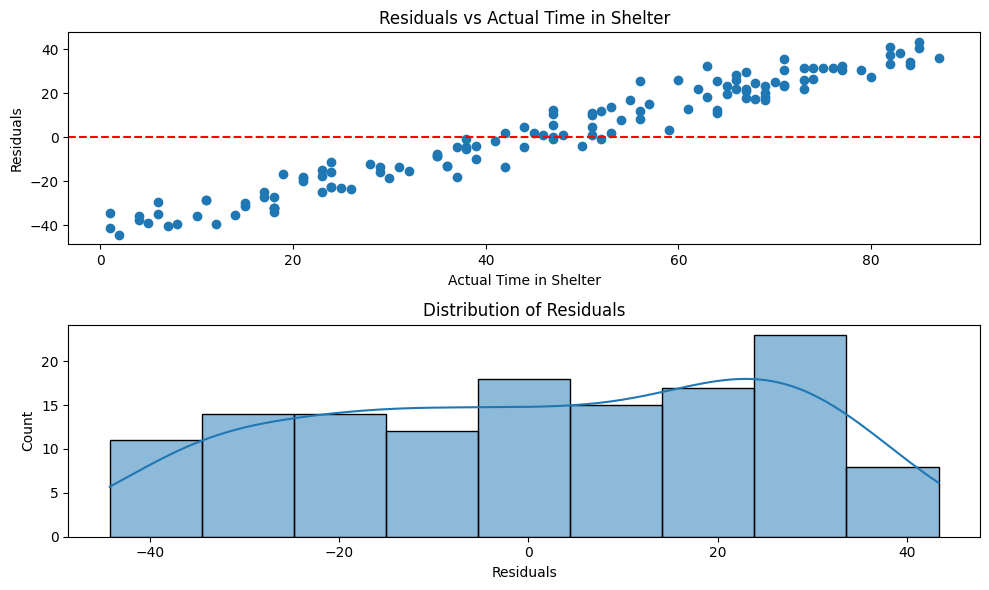

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Load data
data = data_frame


# Filter the data where AdoptionLikelihood is 1
data = data[data['AdoptionLikelihood'] == 1]
data = data.drop(columns=['PetID'])
# Preprocessing (example)
data = pd.get_dummies(data, columns=['PetType','Breed','Size', 'Color', 'Size', 'Vaccinated', 'HealthCondition'])
X = data.drop(columns=['TimeInShelterDays'])
y = data['TimeInShelterDays']


# Normalize numerical features
numerical_features = ['AgeMonths', 'WeightKg', 'AdoptionFee']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

# Residual Analysis
residuals = y_test - y_pred

# Plotting residuals
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Residuals plot
plt.subplot(2, 1, 1)
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Time in Shelter')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Time in Shelter')

# Distribution of residuals
plt.subplot(2, 1, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()
